# Домашнее задание №3

In [1]:
%%time
import numpy as np
from scipy.stats import t
from scipy.stats import norm
import matplotlib.pyplot as plt
from scipy import stats
import pandas as pd
import io
import requests
import seaborn as sns

%matplotlib inline

Wall time: 5.53 s


Таблица Indian liver pations records.

In [2]:
%%time
url="http://yustiks.ru/dataset/indian_liver_patient.csv"
data=pd.read_csv(url)
data[:6].head()

Wall time: 831 ms


,Age,Gender,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Dataset
0,65,Female,0.7,0.1,187,16,18,6.8,3.3,0.90,1
1,62,Male,10.9,5.5,699,64,100,7.5,3.2,0.74,1
2,62,Male,7.3,4.1,490,60,68,7.0,3.3,0.89,1
3,58,Male,1.0,0.4,182,14,20,6.8,3.4,1.00,1
4,72,Male,3.9,2.0,195,27,59,7.3,2.4,0.40,1


Columns:

*  Age of the patient
*  Gender of the patient
*  Total Bilirubin
*  Direct Bilirubin
*  Alkaline Phosphotase
*  Alamine Aminotransferase
*  Aspartate Aminotransferase
*  Total Protiens
*  Albumin
*  Albumin and Globulin Ratio
*  Dataset: field used to split the data into two sets (patient with liver disease, or no disease)


Построить одномерную линейную регрессию Direct_Bilirubin и Total_Bilirubin. Построить график. Строим прямую с помощью уравнения которое мы посчитали. Предсказать несколько элементов из таблицы с помощью метода predict() и сравнить с результатом табличным.

In [3]:
from sklearn.linear_model import LinearRegression
age = data['Direct_Bilirubin']
thalach = data['Total_Bilirubin']
model = LinearRegression()
result = model.fit(np.array(thalach).reshape(-1,1), age)

print('intercept:', model.intercept_)

print('slope:', model.coef_)

intercept: 0.1811674367972489
slope: [0.39557996]


In [4]:
print(f'Общее уравнение регрессии имеет вид: y=kx+b')
print(f'Наше уравнение регрессии имеет вид: y={round(model.coef_[0], 4)}x+{round(model.intercept_, 4)}')

Общее уравнение регрессии имеет вид: y=kx+b
Наше уравнение регрессии имеет вид: y=0.3956x+0.1812


Построить многомерную линейную регрессию для предсказания болезни (Dataset) от двух параметров. Параметры подобрать с помощью матрицы корреляций. Предсказать несколько значений из таблицы и сравнить результат модели от табличного значения.

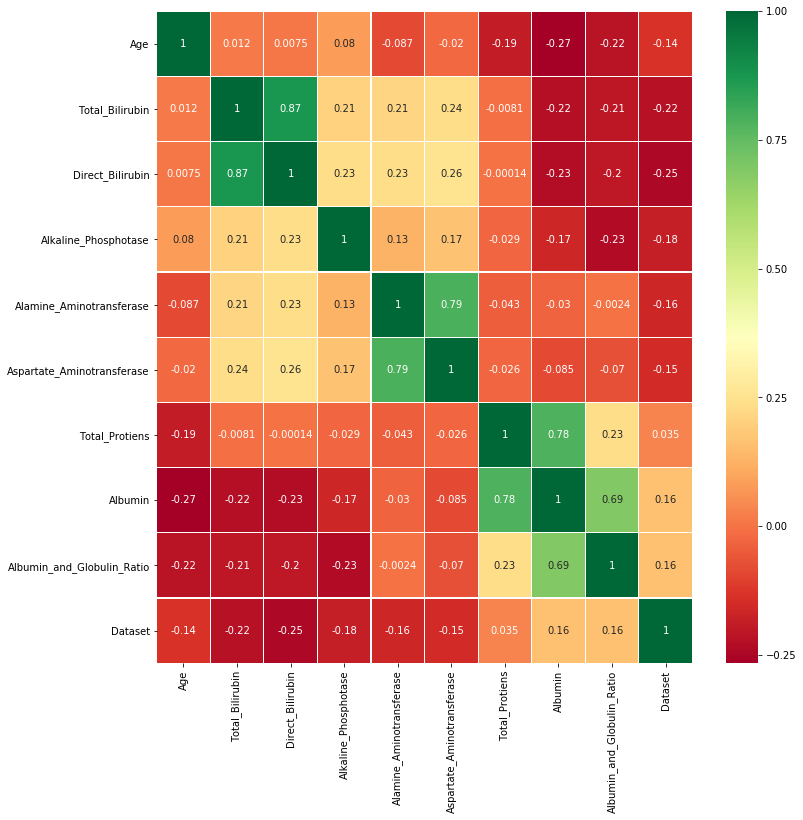

In [5]:
# Смотрим матрицу корреляций для параметров
sns.heatmap(data.corr(),annot=True,cmap='RdYlGn',linewidths=0.2) #data.corr()-->correlation matrix
fig=plt.gcf()
fig.set_size_inches(12,12)
plt.show()


# Выбираем [Albumin] и [Total_Protiens]
# И как еще один параметр берем [Dataset]


In [6]:
# Для контроля
data = data[ ["Albumin", "Total_Protiens", "Dataset"] ]
data.head()

,Albumin,Total_Protiens,Dataset
0,3.3,6.8,1
1,3.2,7.5,1
2,3.3,7.0,1
3,3.4,6.8,1
4,2.4,7.3,1


In [7]:
# Проверяем целостность данных
print(f'В матрице {data.isnull().values.sum()} отсутствующих значений(-я)')

# Где-то есть пропуски. Давайте заполним их медианой, например

В матрице 0 отсутствующих значений(-я)


Предсказать несколько значений из таблицы и сравнить результат модели от табличного значения.

In [8]:
"""
Intercept - коэффициент b в уравнении прямой y=kx+b
slope - коэффициент k в уравнении прямой y=kx+b
"""


# Получаем коэффициенты K и B для линейного уравнения регрессии
from sklearn.linear_model import LinearRegression


albumin = data['Albumin']
total_protiens = data['Total_Protiens']
dataset = data['Dataset']

x = np.vstack([np.array(albumin), np.array(total_protiens)]).T
y = np.array(dataset)

# Строим модель
model = LinearRegression().fit(x,y)

# Печатаем данные
print('intercept:', model.intercept_)
print('slope:', model.coef_)


intercept: 1.307233045881302
slope: [ 0.19774841 -0.09903766]


In [9]:
# И пробуем предсказать для последних 5-ти значений из df

predict = np.vstack([np.array(albumin), np.array(total_protiens)]).T

# Для контроля
predict

array([[3.3, 6.8],
       [3.2, 7.5],
       [3.3, 7. ],
       ...,
       [3.2, 6.4],
       [3.4, 6.8],
       [4.4, 7.3]])

In [10]:
# Предсказываем значения
print('Предсказание модели: ', model.predict(predict)[-5:])

Предсказание модели:  [1.03930833 1.34580202 1.30618696 1.30612158 1.45435116]


In [11]:
data['Predict'] = model.predict(predict)
data.tail(10)

,Albumin,Total_Protiens,Dataset,Predict
573,1.9,6.2,1,1.068922
574,2.4,6.6,1,1.128181
575,2.5,7.9,1,1.019207
576,2.2,5.3,1,1.217380
577,2.6,5.4,1,1.286576
578,1.6,5.9,2,1.039308
579,3.2,6.0,1,1.345802
580,3.2,6.4,1,1.306187
581,3.4,6.8,1,1.306122
582,4.4,7.3,2,1.454351


Посчитать квартили для всех колонок. 

In [12]:
# Квартили всех колонок

print('---Q1---')
print(data.quantile(0.25, axis = 0))
print()

print('---Q2---')
print(data.quantile(0.50, axis = 0))
print()

print('---Q3---')
print(data.quantile(0.75, axis = 0))
print()

print('---Q4---')
print(data.quantile(1, axis = 0))

---Q1---
Albumin           2.600000
Total_Protiens    5.800000
Dataset           1.000000
Predict           1.227202
Name: 0.25, dtype: float64

---Q2---
Albumin           3.100000
Total_Protiens    6.600000
Dataset           1.000000
Predict           1.296381
Name: 0.5, dtype: float64

---Q3---
Albumin           3.800000
Total_Protiens    7.200000
Dataset           2.000000
Predict           1.345867
Name: 0.75, dtype: float64

---Q4---
Albumin           5.500000
Total_Protiens    9.600000
Dataset           2.000000
Predict           1.553029
Name: 1, dtype: float64


Построить график histogram двух выборок по наличию или отсутствию болезни: люди, возрастом до 50 лет, и люди после 50 лет. Посчитать среднее значение и квартиль 0.5 в данных выборках. Чем они отличаются?

In [13]:
# Читаем данные
url="http://yustiks.ru/dataset/indian_liver_patient.csv"
data=pd.read_csv(url)

# Выборка Младше 50
less_50 = data[ data['Age'] < 50 ]

# Выборка Старше 50
more_50 = data[ data['Age'] >= 50 ]


print(f'Среднее значение для пациентов старше 50 лет равно {more_50["Dataset"].mean()}')
print(f'Квартиль .5 для пациентов старше 50 лет равен {more_50["Dataset"].quantile([.5][0]) }')
      
print()
      
print(f'Среднее значение для пациентов младше 50 лет равно {less_50["Dataset"].mean()}')
print(f'Квартиль .5 для пациентов младше 50 лет равен {less_50["Dataset"].quantile([.5][0]) }')

print()
print()
      
print("""Квартиль 0.5 - это граница в наборе данных, которые показывает, что слева от нее находится ровно 50% значения и справа оставшаяся часть""")
print("""Среднее - это величина, которая показывает какое среднее значение имеется весь набор данных""")

Среднее значение для пациентов старше 50 лет равно 1.2391304347826086
Квартиль .5 для пациентов старше 50 лет равен 1.0

Среднее значение для пациентов младше 50 лет равно 1.3172804532577904
Квартиль .5 для пациентов младше 50 лет равен 1.0


Квартиль 0.5 - это граница в наборе данных, которые показывает, что слева от нее находится ровно 50% значения и справа оставшаяся часть
Среднее - это величина, которая показывает какое среднее значение имеется весь набор данных


'Геометрическое распределение'

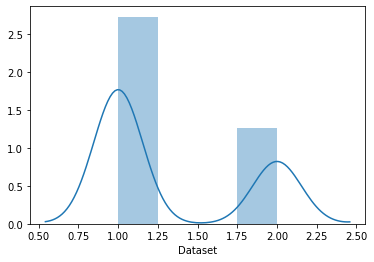

In [14]:
# Смотри распределение у людей младше 50
sns.distplot(less_50['Dataset'])

"""Геометрическое распределение"""

'Распределение Бернулли'

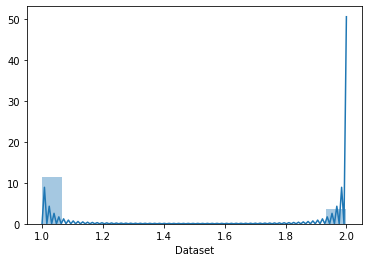

In [15]:
# Смотри распределение у людей старше 50
sns.distplot(more_50['Dataset'])

"""Распределение Бернулли"""


Посчитать критерий одновыборочный t-критерий для выборки по критерию Total_Bilirubin у больных людей. Как показатель помогает понять, что выборки не похожа на генеральную совокупность?

In [16]:
"""
Мы выдвигаем нулевую гипотезу о том, что наша выборка отличается от генеральной совокупности
"""
ill_total_blrbn = data[ data['Dataset'] == 1]['Total_Bilirubin']

# считаем p-value
t_value, p_value = stats.ttest_1samp(ill_total_blrbn, data['Total_Bilirubin'].mean())
print(f't-value = {t_value}\np-value = {p_value}')

print()
print(f'\033[1mВЫВОД: Так как p-value < 5%, то мы принимаем нулевую гипотезу, что наша выборка не похожа на генеральную совокупность.')

t-value = 2.471063305746647
p-value = 0.013871861207640042

ВЫВОД: Так как p-value < 5%, то мы принимаем нулевую гипотезу, что наша выборка не похожа на генеральную совокупность.


Посчитать критерий t для двух выборок: больные и здоровые (по критерию Total_Bilirubin). Имеют ли данные группы схожесть?

In [17]:
"""
Нам нужно понять отличаются ли наши две выборки?
Поэтому считаем духвыборочный t-критерий
"""

# Больные с критерием Total_Bilirubin
ill_total_blrbn = data[ data['Dataset'] == 1]['Total_Bilirubin']

#Здоровые с критерием Total_Bilirubin
not_ill_total_blrbn = data[ data['Dataset'] == 2]['Total_Bilirubin']

# Считаем двухвыборочный t-критерий
p2_t_value, p2_p_value = stats.ttest_ind(ill_total_blrbn, not_ill_total_blrbn)

print(f't-value = {p2_t_value}\np-value = {p2_p_value}')


print()
print(f'\033[1mВЫВОД: Так как p-value < 5% и t-value высокое ({round(p2_t_value, 4)}), то мы понимаем, что наши две выборки не похожи друг на друга.')

t-value = 5.441441126834863
p-value = 7.801430929364345e-08

ВЫВОД: Так как p-value < 5% и t-value высокое (5.4414), то мы понимаем, что наши две выборки не похожи друг на друга.


Посчитать статистическую значимость для трех выборок (по возрасту) - 1ая группа от 1 до 30 лет, 2ая группа от 30 лет до 55, 3я группа более 55 по выборке Dataset. Сравнить с реальностью (они логично что будут отличаться).

In [18]:
# Читаем данные
url="http://yustiks.ru/dataset/indian_liver_patient.csv"
data=pd.read_csv(url)
data.head()

,Age,Gender,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Dataset
0,65,Female,0.7,0.1,187,16,18,6.8,3.3,0.90,1
1,62,Male,10.9,5.5,699,64,100,7.5,3.2,0.74,1
2,62,Male,7.3,4.1,490,60,68,7.0,3.3,0.89,1
3,58,Male,1.0,0.4,182,14,20,6.8,3.4,1.00,1
4,72,Male,3.9,2.0,195,27,59,7.3,2.4,0.40,1


In [19]:
# Создаем наши выборки
low = data[ data['Age'] <=30 ]['Dataset']
middle = data[ ((data['Age'] > 30) & (data['Age'] <= 55)) ]['Dataset']
high = data[ data['Age'] < 55 ]['Dataset']


In [20]:
# Проведем множественное тестирование (ANOVA)
p3_t_value, p3_p_value = stats.f_oneway(low, middle, high)


print(f't-value = {p3_t_value}\np-value = {p3_p_value}')


print()
print(f'\033[1mВЫВОД: Так как p-value < 5% ({round(p3_p_value, 4)}) и t-value высокое ({round(p3_t_value, 4)}), то мы понимаем, что наши три выборки не похожи друг на друга.')

t-value = 8.272556299247242
p-value = 0.000277112500827856

ВЫВОД: Так как p-value < 5% (0.0003) и t-value высокое (8.2726), то мы понимаем, что наши три выборки не похожи друг на друга.


Вопросы задавать на почту yustiks@gmail.com